In [18]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [19]:
print('train 5523, val 1534 and test 613')


train 5523, val 1534 and test 613


In [15]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from torch import nn

In [49]:
        
class _DecoderBlock2(nn.Module):
    def __init__(self, in_channels, out_channels, num_conv_layers):
        super(_DecoderBlock2, self).__init__()
        middle_channels = int(in_channels / 2)

        layers = [
            nn.ConvTranspose2d(in_channels, in_channels, kernel_size=2, stride=2),
            nn.Conv2d(in_channels, middle_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(middle_channels),
            nn.ReLU(inplace=True)
        ]
        layers += [
                      nn.Conv2d(middle_channels, middle_channels, kernel_size=3, padding=1),
                      nn.BatchNorm2d(middle_channels),
                      nn.ReLU(inplace=True),
                  ] * (num_conv_layers - 2)
        layers += [
            nn.Conv2d(middle_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        ]
        self.decode = nn.Sequential(*layers)


class SegNet(nn.Module):
    def __init__(self, num_classes=1, num_input_channels=4, pretrained=False):
        super(SegNet, self).__init__()
        #######change to work with 4 channels

        vgg =models.vgg19_bn(pretrained=pretrained)     
        features = list(vgg.features.children())
        
        self.enc1 = nn.Sequential( *([nn.Conv2d(num_input_channels, 64, 3, padding=1)])+
                      features[1:7]) 

        #######change to work with 4 channels

        self.enc2 = nn.Sequential(*features[7:14])
        self.enc3 = nn.Sequential(*features[14:27])
        self.enc4 = nn.Sequential(*features[27:40])
        self.enc5 = nn.Sequential(*features[40:])

        self.dec5 = nn.Sequential(
            *([nn.ConvTranspose2d(512, 512, kernel_size=2, stride=2)] +
              [nn.Conv2d(512, 512, kernel_size=3, padding=1),
               nn.BatchNorm2d(512),
               nn.ReLU(inplace=True)] * 4)
        )
        self.dec4 = _DecoderBlock2(1024, 256, 4)
        self.dec3 = _DecoderBlock2(512, 128, 4)
        self.dec2 = _DecoderBlock2(256, 64, 2)
        self.dec1 = _DecoderBlock2(128, num_classes, 2)
        #initialize_weights(self.dec5, self.dec4, self.dec3, self.dec2, self.dec1)

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(enc1)
        enc3 = self.enc3(enc2)
        enc4 = self.enc4(enc3)
        enc5 = self.enc5(enc4)

        dec5 = self.dec5(enc5)
        dec4 = self.dec4(torch.cat([enc4, dec5], 1))
        dec3 = self.dec3(torch.cat([enc3, dec4], 1))
        dec2 = self.dec2(torch.cat([enc2, dec3], 1))
        dec1 = self.dec1(torch.cat([enc1, dec2], 1))
        return dec1
    
    
model = SegNet()
model 

SegNet(
  (enc1): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (enc3): Sequential

In [48]:
enc1 = nn.Sequential( *([nn.Conv2d(4, 64, 3, padding=1)])+
                      features[1:7]) 
enc1

Sequential(
  (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [23]:
#####Initialise the model ###############################################
import torchvision.models as models
num_classes = 1 
gg16 = models.vgg19_bn()
gg16    # self.conv1    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [9]:
#####Initialise the model ###############################################
import torchvision.models as models
num_classes = 1 
albunet =  models.resnet34()
albunet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [20]:
#####Initialise the model ###############################################
import torchvision.models as models
num_classes = 1 
gg16 = models.vgg11()
gg16    # self.conv1    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

### Plotting training and validation loss function

In [21]:
file  = open("history_model.txt", "r")
filedata = file.read()
filedata = filedata.split(",")
loss = []
for i in filedata:
    i = i.strip(" ")
    #print(i)
    if str(i).startswith("loss"):
        i = i.split(":")
        loss.append(float(i[1]))
        #print(i[1])

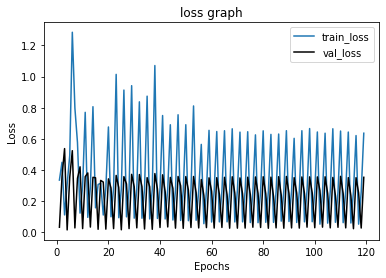

In [22]:
f = plt.figure()
#y_train = np.asarray(loss[0::2])
y_train = np.asarray(loss[0::2])
y_val = np.asarray(loss[1::2])

x =np.asarray(list(range(0,len(y_val))))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss graph")
#plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.plot(x[1:120:],y_train[1:120:],label = 'train_loss') ##0 has a bad value too high
plt.plot(x[1:120:],y_val[1:120:],'k', label = 'val_loss')
plt.legend()
plt.show()
f.savefig("predictions/loss_convergence_vf.pdf", bbox_inches='tight')


### Plotting predictions with corresponding losses

### plot test

In [47]:
!python prediction_mask.py  # test the metrics   resize the imagess

bce: 0.001356, dice: 0.988360, loss: 0.006498, jaccard: 0.976987
1
bce: 0.011600, dice: 0.996310, loss: 0.007645, jaccard: 0.992647
2
bce: 0.008394, dice: 0.996498, loss: 0.005948, jaccard: 0.993019
3
bce: 0.038609, dice: 0.993471, loss: 0.022569, jaccard: 0.987027
4
bce: 0.002164, dice: 0.961230, loss: 0.020467, jaccard: 0.925346
5
bce: 0.093370, dice: 0.477129, loss: 0.308120, jaccard: 0.313288
6
bce: 0.019935, dice: 0.989438, loss: 0.015249, jaccard: 0.979096
7
bce: 0.141090, dice: 0.949988, loss: 0.095551, jaccard: 0.904740
8
bce: 0.001910, dice: 0.980475, loss: 0.010718, jaccard: 0.961695
9
bce: 0.037898, dice: 0.981608, loss: 0.028145, jaccard: 0.963880
10
bce: 0.149616, dice: 0.982490, loss: 0.083563, jaccard: 0.965582
11
bce: 0.023800, dice: 0.975913, loss: 0.023944, jaccard: 0.952958
12
bce: 0.055553, dice: 0.975732, loss: 0.039911, jaccard: 0.952614
13
bce: 0.053822, dice: 0.973635, loss: 0.040094, jaccard: 0.948624
14
bce: 0.027667, dice: 0.929018, loss: 0.049324, jaccard: 0

In [48]:
loss_file = open("predictions/pred_loss_dist.txt")

filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

val_file = "predictions/inputs_test_dist_29.npy"
pred_file = "predictions/pred_test_dist_29.npy"
label_file = "predictions/labels_test_dist_29.npy"

val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape

(1, 512, 512)

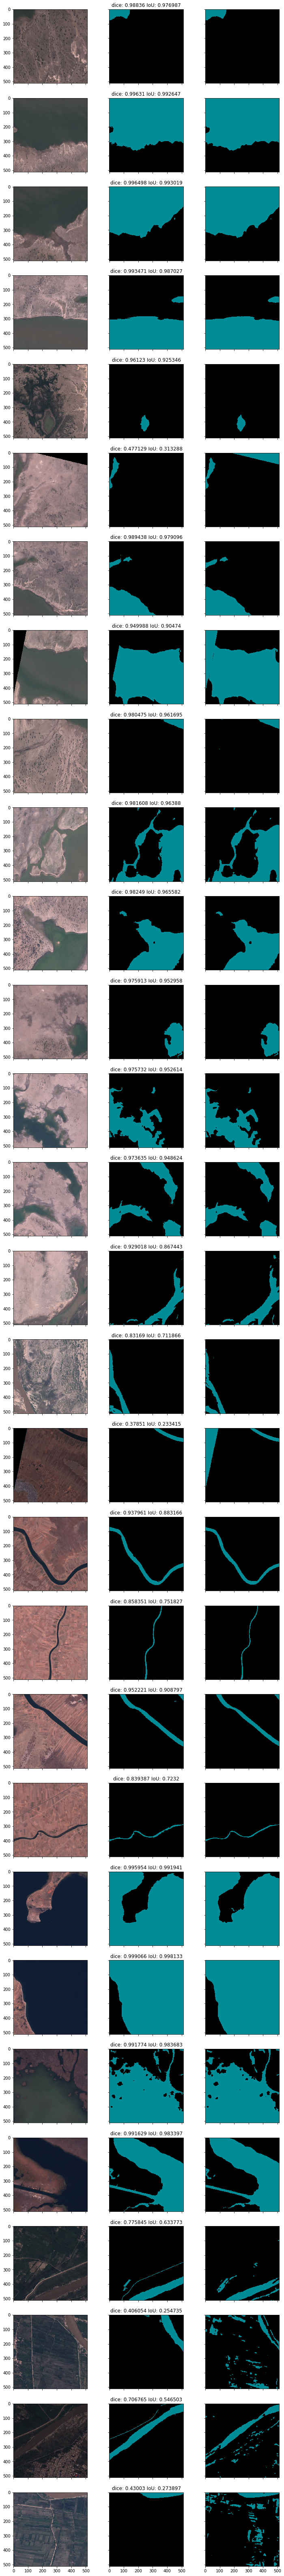

In [49]:
input_images_rgb = [helper.reverse_transform(x) for x in val_images[:,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:,0,:,:,:]]
#print(np.shape(input_images_rgb))
#print(len([input_images_rgb, target_masks_rgb, pred_rgb]))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb],filedata,save=1)

### Metrics

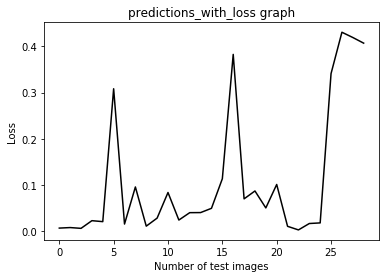

Ctd: 29 Loss: 0.11054424137931033


In [39]:
loss_file = open("predictions/pred_loss_dist.txt")

f = plt.figure()
filedata = loss_file.read()
#filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("loss"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Loss")
plt.title("predictions_with_loss graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_loss_dist.pdf", bbox_inches='tight')

print('Ctd:',len(loss),'Loss:',np.mean(loss))

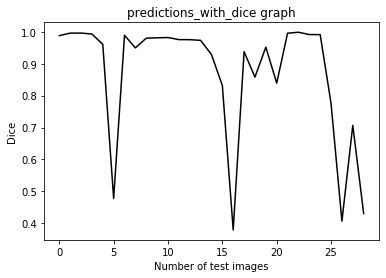

Ctd: 29 Dice: 0.8705700689655174


In [40]:
loss_file = open("predictions/pred_loss_dist.txt")

f = plt.figure()
filedata = loss_file.read()
#filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")
loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("dice"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_dice graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_dice_dist.pdf", bbox_inches='tight')

print('Ctd:',len(loss),'Dice:',np.mean(loss))

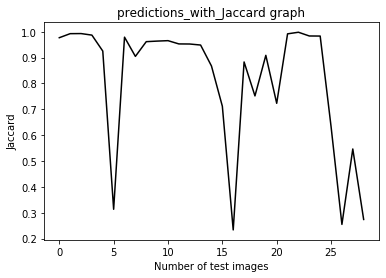

Ctd: 29 Jaccard:  0.8125268620689655


In [42]:
loss_file = open("predictions/pred_loss_dist.txt")

f = plt.figure()
filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")

loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("jaccard"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Jaccard")
plt.title("predictions_with_Jaccard graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_Jaccard_dist.pdf", bbox_inches='tight')

print('Ctd:',len(loss),'Jaccard: ',np.mean(loss))

In [12]:
from pathlib import Path
import argparse
import cv2
import numpy as np
from tqdm import tqdm


def general_dice(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return dice(y_true == 1, y_pred == 1)


def general_jaccard(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return jaccard(y_true == 1, y_pred == 1)


def jaccard(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)


def dice(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)


if __name__ == '__main__':

    result_dice = []
    result_jaccard = []

    for i in range(len(val_label)):
        y_true=val_label[i]
        y_pred=pred_images[i]
        #y_true = (cv2.imread(str(file_name), 0) > 255 * 0.5).astype(np.uint8)

        #pred_file_name = Path(args.target_path) / (file_name.stem.replace('_a', '') + '.png')

        #y_pred = (cv2.imread(str(pred_file_name), 0) > 255 * 0.5).astype(np.uint8)

        result_dice += [dice(y_true, y_pred)]
        result_jaccard += [jaccard(y_true, y_pred)]

    print('Dice = ', np.mean(result_dice), np.std(result_dice))
    print('Jaccard = ', np.mean(result_jaccard), np.std(result_jaccard))

Dice =  0.870565103081231 0.19302505131209088
Jaccard =  0.8125268868250515 0.24570331055303093


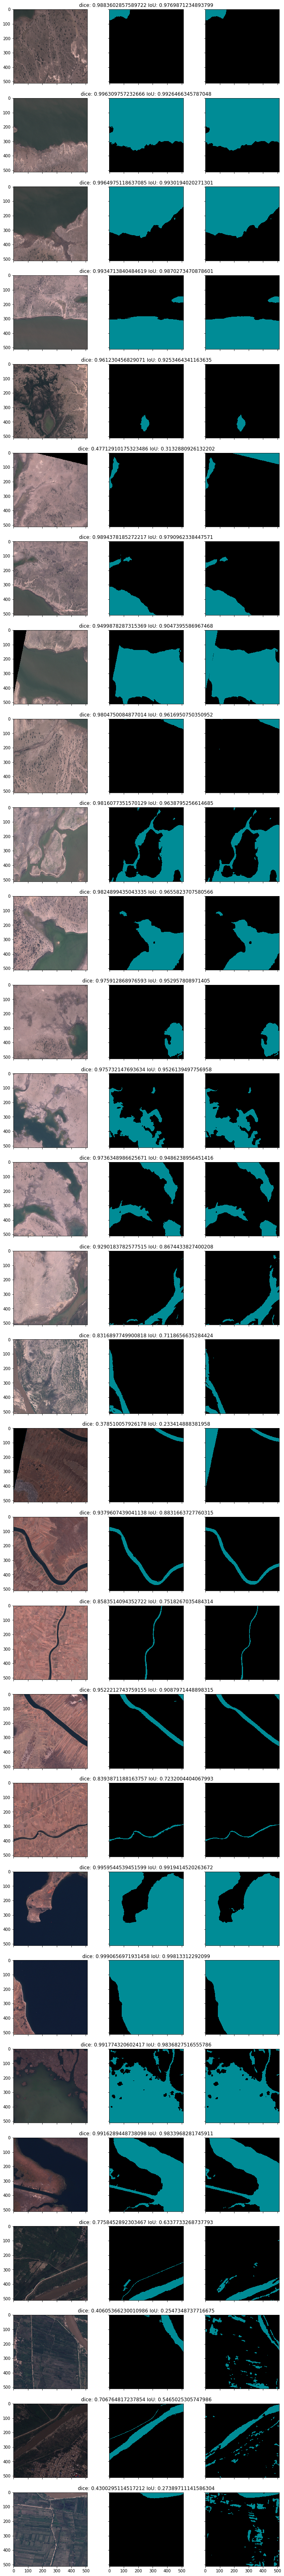

In [17]:
input_images_rgb = [helper.reverse_transform(x) for x in val_images[:,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:,0,:,:,:]]
#print(np.shape(input_images_rgb))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb], filedata,save=1)
